In [2]:
import wandb
wandb.login()


True

In [3]:
#!pip install wandb==0.16.1

In [4]:
import wandb
print(wandb.__version__)
import wandb.keras

0.16.1


2024-07-02 20:54:21.469785: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 20:54:23.294512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 20:54:23.296065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 20:54:23.478026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 20:54:23.828064: I tensorflow/core/platform/cpu_feature_guar

In [5]:
import tensorflow as tf

# List available GPU devices
gpus = tf.config.list_physical_devices('GPU')
print(f"Available GPUs: {len(gpus)}")
for gpu in gpus:
    print(gpu)


Available GPUs: 1
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [6]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import keras


# Configuration dictionary
config = dict(
    batch_size=2048,
    model_name='U-Net Simple',
    epochs=100,
    init_learning_rate=0.0001,
    lr_decay_rate=0.1,
    optimizer='adam',
    loss_fn='mean_squared_error',
    earlystopping_patience=10,
    metrics=[keras.metrics.KLDivergence(), keras.metrics.MeanAbsoluteError(),
                       keras.metrics.MeanAbsolutePercentageError()]
)

import wandb
from wandb.keras import WandbCallback

wandb.init(project='SiSAD', config=config)



2024-07-02 20:54:43.006209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1926] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31127 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8a:00.0, compute capability: 7.0
wandb: wandb version 0.17.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /ocean/projects/phy240031p/shared/wandb/run-20240702_205443-tuwl9j4e
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run happy-pond-6
wandb: ⭐️ View project at https://wandb.ai/fiorest/SiSAD
wandb: 🚀 View run at https://wandb.ai/fiorest/SiSAD/runs/tuwl9j4e


tf.Tensor(
[[0.03789032 0.02908516 0.0334708  ... 0.01976085 0.01781211 0.01631937]
 [0.02656999 0.03473099 0.02546588 ... 0.03049586 0.03609994 0.02087934]
 [0.00713316 0.03110497 0.02306964 ... 0.0226306  0.03377111 0.04315394]
 ...
 [0.01961878 0.02370407 0.01477608 ... 0.01963729 0.03397893 0.02096274]
 [0.03771489 0.02429339 0.01704078 ... 0.00911159 0.0397415  0.01713077]
 [0.00297257 0.03976951 0.02328424 ... 0.03098227 0.0311656  0.02518782]], shape=(48, 48), dtype=float32)


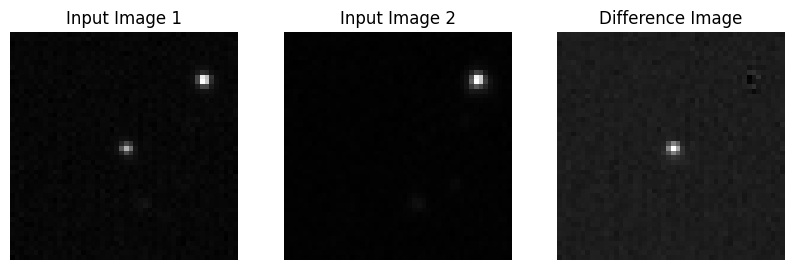

tf.Tensor(
[[0.18973972 0.29707727 0.3120114  ... 0.38894477 0.17850217 0.38756227]
 [0.16781949 0.3842439  0.30276355 ... 0.31288943 0.30498904 0.29372898]
 [0.27975172 0.41139227 0.19584818 ... 0.2593005  0.30802134 0.27486688]
 ...
 [0.26755884 0.09368105 0.14534834 ... 0.2978933  0.23064053 0.2332043 ]
 [0.20913225 0.25051388 0.23385961 ... 0.33985814 0.2030073  0.30276468]
 [0.33399022 0.24606337 0.30169052 ... 0.18113913 0.3452146  0.27925378]], shape=(48, 48), dtype=float32)


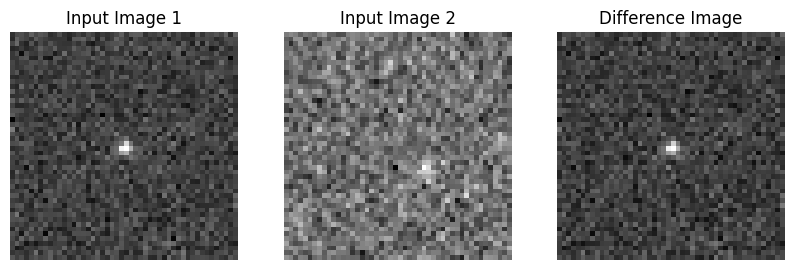

tf.Tensor(
[[0.00133108 0.00145904 0.00075075 ... 0.00101677 0.00191328 0.00137004]
 [0.00119333 0.00133736 0.00076889 ... 0.00089544 0.00104    0.00119616]
 [0.00111068 0.00145804 0.00124432 ... 0.00088024 0.00137488 0.00127513]
 ...
 [0.00084725 0.00086706 0.00142721 ... 0.00130237 0.00068914 0.00122506]
 [0.00150059 0.0013289  0.0018945  ... 0.0013609  0.00166303 0.00110502]
 [0.00184395 0.00194031 0.00053572 ... 0.00146009 0.0016172  0.00131288]], shape=(48, 48), dtype=float32)


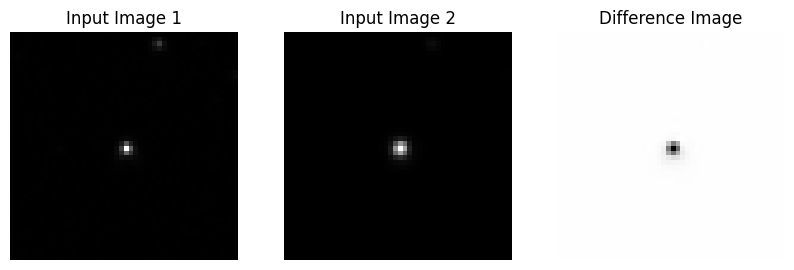

tf.Tensor(
[[0.00260217 0.01207481 0.01246958 ... 0.01113094 0.01236807 0.00512962]
 [0.00868097 0.01130238 0.01468096 ... 0.00780643 0.00815427 0.00582916]
 [0.00673231 0.01001708 0.00695153 ... 0.00874052 0.00906639 0.00667475]
 ...
 [0.01193997 0.00728471 0.0112087  ... 0.00865405 0.01108095 0.00793352]
 [0.01110808 0.00910042 0.01041627 ... 0.00869274 0.006973   0.00863056]
 [0.0120044  0.01166666 0.00742729 ... 0.00835331 0.0135918  0.01047519]], shape=(48, 48), dtype=float32)


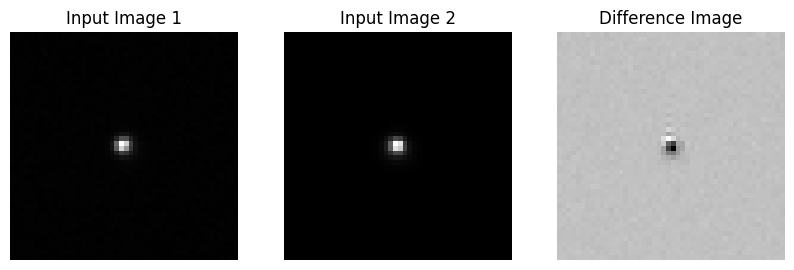

tf.Tensor(
[[0.00544337 0.00437406 0.00494355 ... 0.00483079 0.00548039 0.00505604]
 [0.00530643 0.00507584 0.00496779 ... 0.00507108 0.00514958 0.00517171]
 [0.00539081 0.00540954 0.00512108 ... 0.00514389 0.00512702 0.00529306]
 ...
 [0.00502039 0.00548504 0.00538224 ... 0.         0.         0.        ]
 [0.00571794 0.00521283 0.00535983 ... 0.         0.         0.        ]
 [0.00544438 0.0050527  0.00531684 ... 0.         0.         0.        ]], shape=(48, 48), dtype=float32)


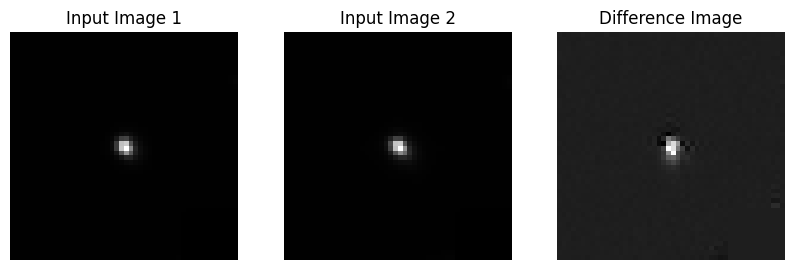

tf.Tensor(
[[0.3319822  0.38263002 0.24737774 ... 0.3044266  0.20918296 0.20507383]
 [0.24687824 0.12979734 0.26323035 ... 0.33549094 0.21357565 0.10399805]
 [0.33845627 0.33740848 0.4230525  ... 0.2788523  0.32503313 0.18367471]
 ...
 [0.08812299 0.29306033 0.39993525 ... 0.26502794 0.27118    0.1386632 ]
 [0.1383443  0.27629745 0.3412178  ... 0.22253387 0.25989038 0.276782  ]
 [0.31639844 0.43849277 0.13860232 ... 0.3343954  0.17198308 0.33690485]], shape=(48, 48), dtype=float32)


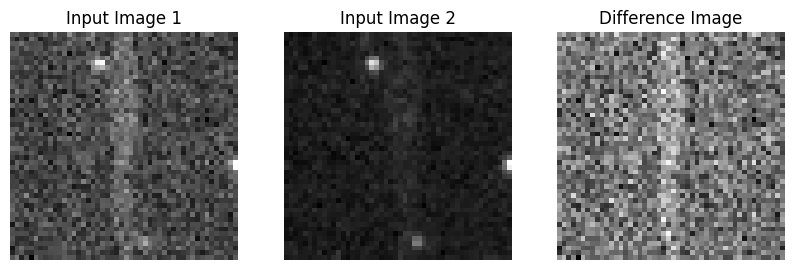

tf.Tensor(
[[0.01800009 0.01776955 0.01527749 ... 0.01656877 0.01694    0.01790188]
 [0.01777485 0.01721369 0.01592673 ... 0.01627102 0.017148   0.01825554]
 [0.01757631 0.01771356 0.01720176 ... 0.01781968 0.01591303 0.01655519]
 ...
 [0.01584918 0.01633273 0.01868202 ... 0.01576634 0.01704515 0.01629732]
 [0.01620061 0.01491649 0.01619078 ... 0.01803413 0.01800386 0.01653051]
 [0.01609811 0.01475509 0.01744054 ... 0.01711178 0.01831566 0.01831385]], shape=(48, 48), dtype=float32)


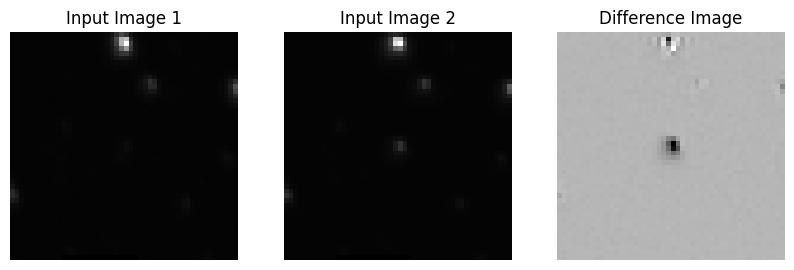

tf.Tensor(
[[0.3234811  0.20927386 0.22368564 ... 0.18073618 0.29260215 0.2641199 ]
 [0.12618022 0.23214845 0.2816506  ... 0.23031491 0.25428674 0.2963677 ]
 [0.19246669 0.17345269 0.219419   ... 0.20852898 0.25469527 0.12779169]
 ...
 [0.18634975 0.35056505 0.14947802 ... 0.23443948 0.15792255 0.20365325]
 [0.13406785 0.24923864 0.34856236 ... 0.12510909 0.14877218 0.2083191 ]
 [0.18595818 0.2418302  0.27950358 ... 0.09210993 0.38423842 0.3097236 ]], shape=(48, 48), dtype=float32)


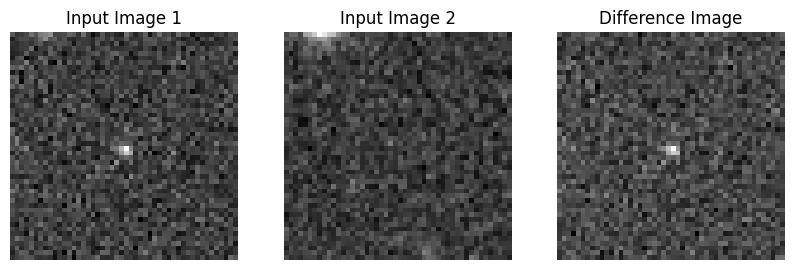

tf.Tensor(
[[0.00386605 0.00299399 0.00058569 ... 0.00658387 0.00242332 0.00121907]
 [0.00595517 0.00234222 0.00302053 ... 0.00483847 0.00309213 0.00214633]
 [0.0083988  0.0051044  0.00366921 ... 0.00345192 0.00310342 0.00350099]
 ...
 [0.00143161 0.00345416 0.00417235 ... 0.00313118 0.00274936 0.00439937]
 [0.00366487 0.00290131 0.00055768 ... 0.00183102 0.00386411 0.00319547]
 [0.00379766 0.00333975 0.00286179 ... 0.00303233 0.00417895 0.01253488]], shape=(48, 48), dtype=float32)


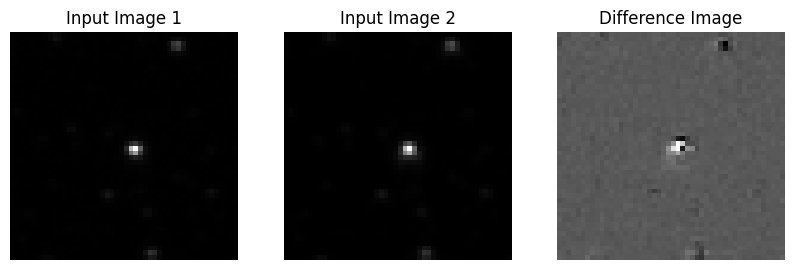

tf.Tensor(
[[0.03491732 0.05853265 0.04604819 ... 0.06918886 0.01964064 0.06130325]
 [0.04473303 0.0503247  0.05645153 ... 0.06102013 0.08491196 0.0380989 ]
 [0.03885041 0.04538951 0.05413367 ... 0.02095655 0.03695893 0.04583099]
 ...
 [0.04941195 0.05785564 0.0568947  ... 0.03887896 0.03430134 0.05139765]
 [0.03587342 0.04926829 0.05322675 ... 0.05926423 0.03773496 0.03501229]
 [0.06665146 0.07086324 0.04893464 ... 0.04099013 0.0463503  0.05370375]], shape=(48, 48), dtype=float32)


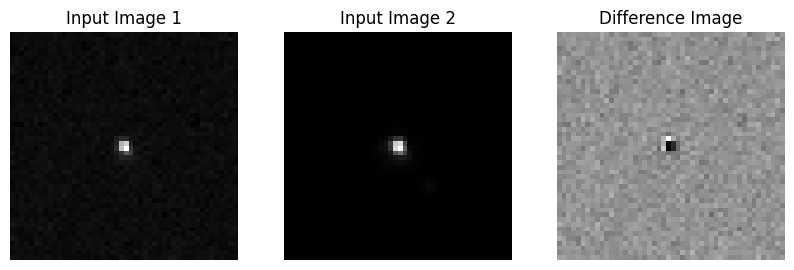

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf


def _parse_function(proto):
    keys_to_features = {
        'images': tf.io.FixedLenFeature([], tf.string),
    }
    parsed_features = tf.io.parse_single_example(proto, keys_to_features)
    images = tf.io.parse_tensor(parsed_features['images'], out_type=tf.float32)
    images = tf.reshape(images, [3, 63, 63])  # Three images each 63x63
    # Replace any NaNs with zeros in the parsed images
    images = tf.where(tf.math.is_nan(images), tf.zeros_like(images), images)
    return images


@tf.function
def normalize_images(images):
    img1, img2, diff_img = tf.unstack(images, axis=0)  # Unstack into three separate images
    combined = tf.stack([img1, img2], axis=0)  # Stack img1 and img2 for min/max calculation
    min_val = tf.reduce_min(combined)#, axis=[0, 1], keepdims=True)
    max_val = tf.reduce_max(combined)#, axis=[0, 1], keepdims=True)
    img1_rescaled = (img1 - min_val) / (max_val - min_val)
    img2_rescaled = (img2 - min_val) / (max_val - min_val)
    return img1_rescaled, img2_rescaled, diff_img

@tf.function
def normalize_difference_based_on_range(img1, img2, diff_img):
    difference = img1 - img2
    min_diff = tf.reduce_min(difference, keepdims=True)
    max_diff = tf.reduce_max(difference, keepdims=True)
    diff_img_rescaled =  2 * (diff_img - min_diff) / (max_diff - min_diff) - 1
    return diff_img_rescaled

@tf.function
def preprocess_image(images):
    img1, img2, diff_img = normalize_images(images)
    diff_img_rescaled = normalize_difference_based_on_range(images[0], images[1], images[2])
    input_img = tf.stack([img1, img2], axis=-1)  # Stack along the channel dimension
    input_img = tf.image.crop_to_bounding_box(input_img, 7, 7, 48, 48) #crop

    diff_img_rescaled = tf.expand_dims(diff_img_rescaled, axis=-1)  # Ensure correct shape for output
    diff_img_rescaled = tf.image.crop_to_bounding_box(diff_img_rescaled, 7, 7, 48, 48)#crop

    return input_img, diff_img_rescaled

def load_dataset(tfrecord_paths, batch_size):
    dataset = tf.data.TFRecordDataset(tfrecord_paths)
    dataset = dataset.map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    dataset = dataset.repeat()  # Repeat the dataset indefinitely
    return dataset

# Setup and test
tfrecord_folder_path = "/ocean/projects/phy240031p/shared/TFRecords"
all_tfrecord_paths = [str(path) for path in Path(tfrecord_folder_path).glob('*.tfrecord')]
train_paths, test_val_paths = train_test_split(all_tfrecord_paths, test_size=0.3)
val_paths, test_paths = train_test_split(test_val_paths, test_size=0.5)

train_dataset = load_dataset(train_paths, batch_size=wandb.config['batch_size'])
val_dataset = load_dataset(val_paths, batch_size=wandb.config['batch_size'])

#Optionally visualize some outputs
def plot_sample_images(dataset):
    for inputs, outputs in dataset.take(10):
        print((inputs[0,:,:,0]))

        plt.figure(figsize=(10, 5))
        for i in range(3):
            plt.subplot(1, 3, i+1)
            if i < 2:
                plt.imshow(inputs[0, :, :, i], cmap='gray')
                plt.title(f'Input Image {i+1}')
            else:
                plt.imshow(outputs[0, :, :, 0], cmap='gray')
                plt.title('Difference Image')
            plt.axis('off')
        plt.show()

plot_sample_images(train_dataset)




In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout, concatenate, \
    BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model


def build_unet(input_shape):
    inputs = Input(shape=input_shape)

    # Contraction Path
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    #c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    #c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    # Repeat for additional contraction blocks with increasing filters
    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    #c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    #c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    #c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    #c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    #c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    #c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Fully Convolutional Bottleneck
    bn = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    #bn = BatchNormalization()(bn)
    bn = Activation('relu')(bn)
    bn = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(bn)
    #bn = BatchNormalization()(bn)
    bn = Activation('relu', name='pre_bottleneck')(bn)

    # Global Average Pooling for clustering (optional, remove if not clustering directly from this layer)
    # gap = GlobalAveragePooling2D(name='bottleneck')(bn)

    # Expansive Path
    u6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    #c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    #c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)

    u7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])  # Skip connection from c3
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    #c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    #c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)

    u8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])  # Skip connection from c2
    c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    #c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    #c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)

    u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])  # Skip connection from c1
    c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    #c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    #c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)

    outputs = Conv2D(1, (1, 1), activation='linear')(c9)

    model = Model(inputs=[inputs], outputs=[outputs], name="Custom_U-Net")

    return model


# Adjust the input shape for your 63x63 images with 2 channels (concatenated images)
input_shape = (48, 48, 2)  # Adjusted for the actual size of your images
model = build_unet(input_shape)
model.summary()


#################################
# Compile Model
#################################

# Callbacks remain unchanged except for Wandb callbacks, which are removed

# Compile and Train Model
opt = tf.keras.optimizers.Adam(learning_rate=config['init_learning_rate'])

# Assuming `model` is your model instance
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=[keras.metrics.KLDivergence(), keras.metrics.MeanAbsoluteError(),
                       keras.metrics.MeanAbsolutePercentageError(), keras.metrics.MeanSquaredError()])  # Include custom MRE metric



# Configure the early stopping and learning rate scheduler callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=config['earlystopping_patience'], restore_best_weights=True
)


def lr_scheduler(epoch, lr):
    # log the current learning rate onto W&B
    if wandb.run is None:
        raise wandb.Error("You must call wandb.init() before WandbCallback()")
    wandb.log({'learning_rate': lr}, commit=False)
    if epoch < 7:
        return lr
    else:
        return lr * tf.math.exp(-config['lr_decay_rate'])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

opt = tf.keras.optimizers.Adam(learning_rate=config['init_learning_rate'])


# Initialize the W&B run


# Define WandbCallback for experiment tracking
wandb_callback = WandbCallback(
                           monitor='val_loss',
                           log_weights=True,
                           log_evaluation=True)#,
                           #validation_steps=5)


# callbacks
callbacks = [early_stop, wandb_callback, lr_callback]





# Number of training examples
num_train_samples = len(train_paths) * 2048  # Adjust 2048 based on your actual number of samples per TFRecord or calculation logic
num_val_samples = len(val_paths) * 2048  # Same adjustment as above

train_steps_per_epoch = np.ceil(num_train_samples / config['batch_size']).astype(int)
val_steps_per_epoch = np.ceil(num_val_samples / config['batch_size']).astype(int)



# Train the model
history = model.fit(train_dataset,
                    epochs=100,  # Adjust based on the complexity of the model and the dataset size
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=val_steps_per_epoch,
                    callbacks=callbacks,
                    )


wandb.finish()

Model: "Custom_U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 2)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           608       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['activation[0][0]']          
                                                                                       

 Transpose)                                                                                       
                                                                                                  
 concatenate_1 (Concatenate  (None, 12, 12, 256)          0         ['conv2d_transpose_1[0][0]',  
 )                                                                   'activation_5[0][0]']        
                                                                                                  
 conv2d_12 (Conv2D)          (None, 12, 12, 128)          295040    ['concatenate_1[0][0]']       
                                                                                                  
 activation_11 (Activation)  (None, 12, 12, 128)          0         ['conv2d_12[0][0]']           
                                                                                                  
 dropout_5 (Dropout)         (None, 12, 12, 128)          0         ['activation_11[0][0]']       
          

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/100


2024-07-02 20:56:57.691186: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inCustom_U-Net/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-07-02 20:56:58.588521: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:467] Loaded cuDNN version 90000
2024-07-02 20:57:11.648541: I external/local_xla/xla/service/service.cc:168] XLA service 0x14eb36cd22e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-02 20:57:11.648569: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-07-02 20:57:11.666250: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719968231.800927   84891 device_compiler.h:186] Compiled cluster using X

1406/7829 [====>.........................] - ETA: 56:08 - loss: 0.1209 - kullback_leibler_divergence: 0.9419 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 236.0646 - mean_squared_error: 0.1209

In [ ]:
# Plot training and validation loss curves
def plot_loss_curves(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Call the plot function
plot_loss_curves(history)